![](header.jpg)

# EX8029 Depth Camera

Kevin J. Walchko, Phd

---

The EX8029 camera has an IR depth camera on it which projects a pattern and then calculates the distance based off of the pattern's change.

![](pics/camera.jpg)


In [1]:
import numpy as np
import cv2
import time
from matplotlib import pyplot as plt

# Depth Camera

![](pics/JPLstructredlight.jpg)

The EX8029 has two cameras (stereo) and produces depth images. Looking at both the data and reading the *very limited* description of how it works, it is not a *true* depth camera. Instead, there is a projector (square silver thing) on the front that projects a known pattern and a chip inside calculates the disparity seen between the left/right cameras. This type of sensor is using a technique called structured light. 

[Structured light](https://en.wikipedia.org/wiki/Structured_light) is the process of projecting a known pattern (often grids or horizontal bars) on to a scene. The way that these deform when striking surfaces allows vision systems to calculate the depth and surface information of the objects in the scene.

![](pics/depth.gif)

Typically, people use the disparity map instead of a true depth map to do things. However, if you wish to recreate the 3D environment, where the disparity map was captured, then you have to turn it into a **true** depth map as discussed above.

## Reading the Depth Camera

Since the camera returns a YUYV stream, it is best to read your images in that format instead of the default BGR format. Example:

```python
tbd
```

## Examples

The performance isn't bad and given its compact size and low power requirements actually does a good job.

**Notes:**

- Images captured on a Raspberry Pi 3 with USB2, therefore we are limited in what we can get
- color image is from the left camera @ 640x480 (wxh)
- disparity image is 320x480, it is sort of like an interlaced thing, hence half the width ... strange

In [2]:
def readDepth(folder):
    # read in the images that were captured from the sensor
    img = cv2.imread("{}/image-0-(480, 640, 3).png".format(folder))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    depth = cv2.imread("{}/image-1-(480, 320).png".format(folder))

    # plot the color image and disparity map side-by-side
    plt.figure(figsize=(20,10))
    plt.imshow(np.hstack((img, depth)))
    plt.title('Color {} | Disparity {}'.format(img.shape, depth.shape))

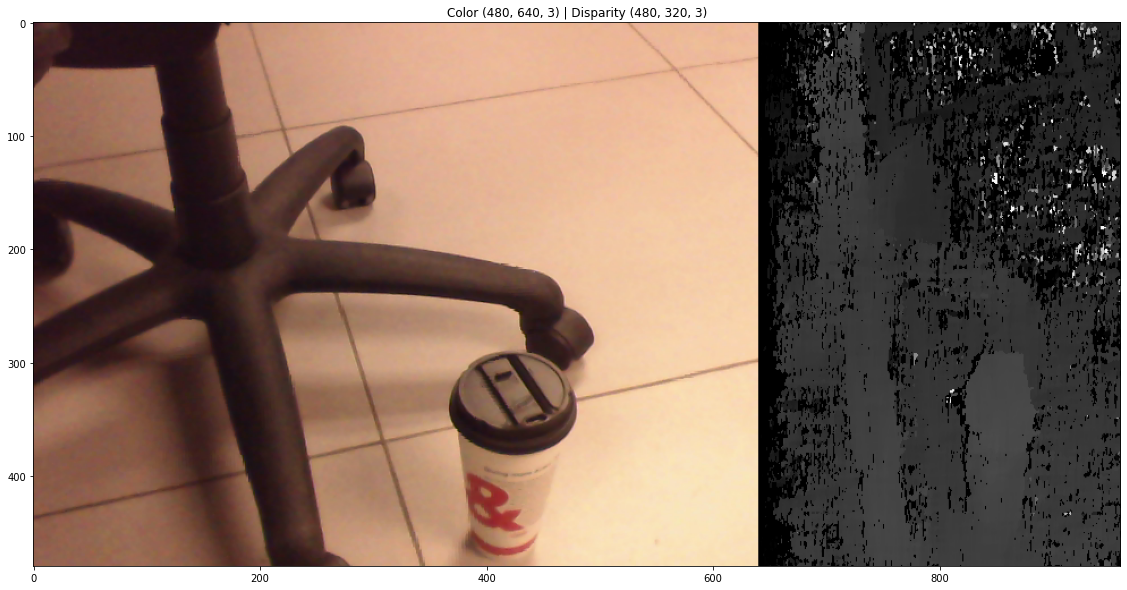

In [3]:
readDepth('floor')

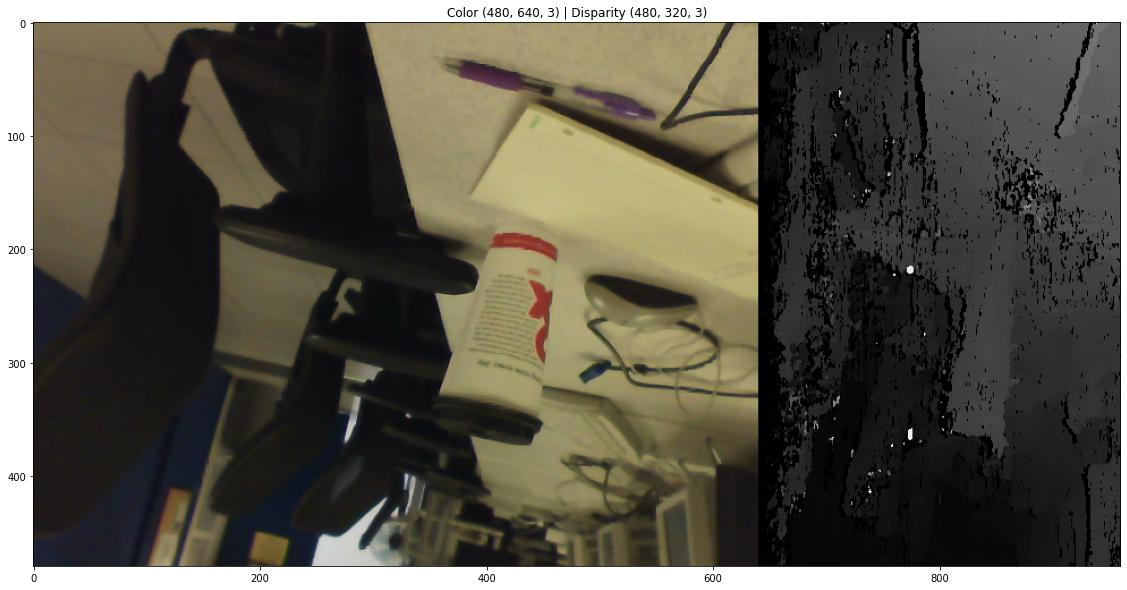

In [4]:
readDepth('table')  # it gets good results, but I was holding the camera upside down

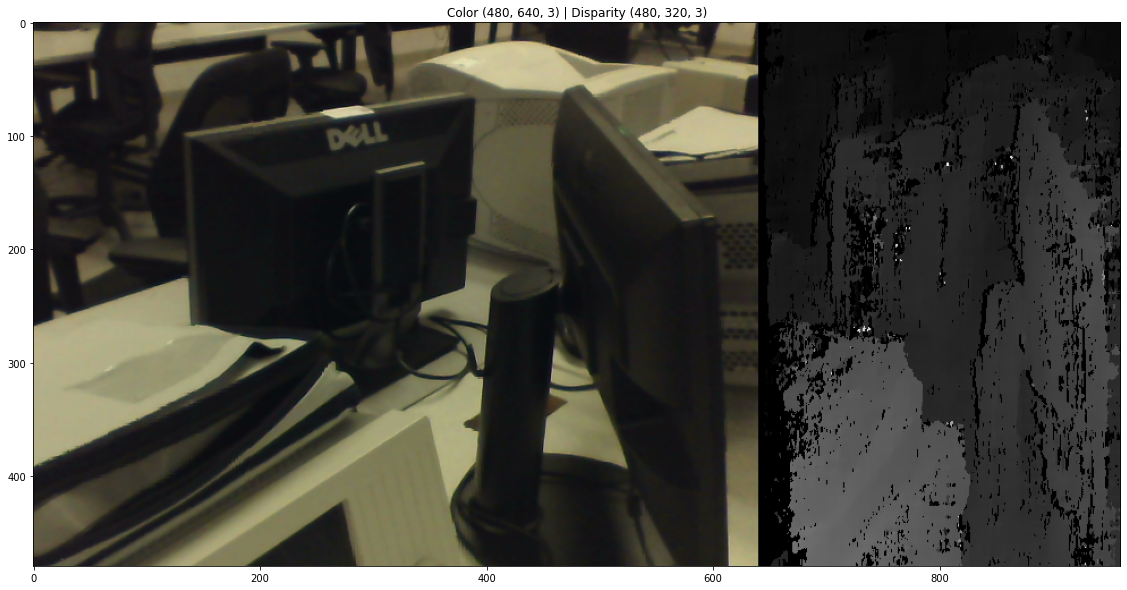

In [5]:
readDepth('table2')

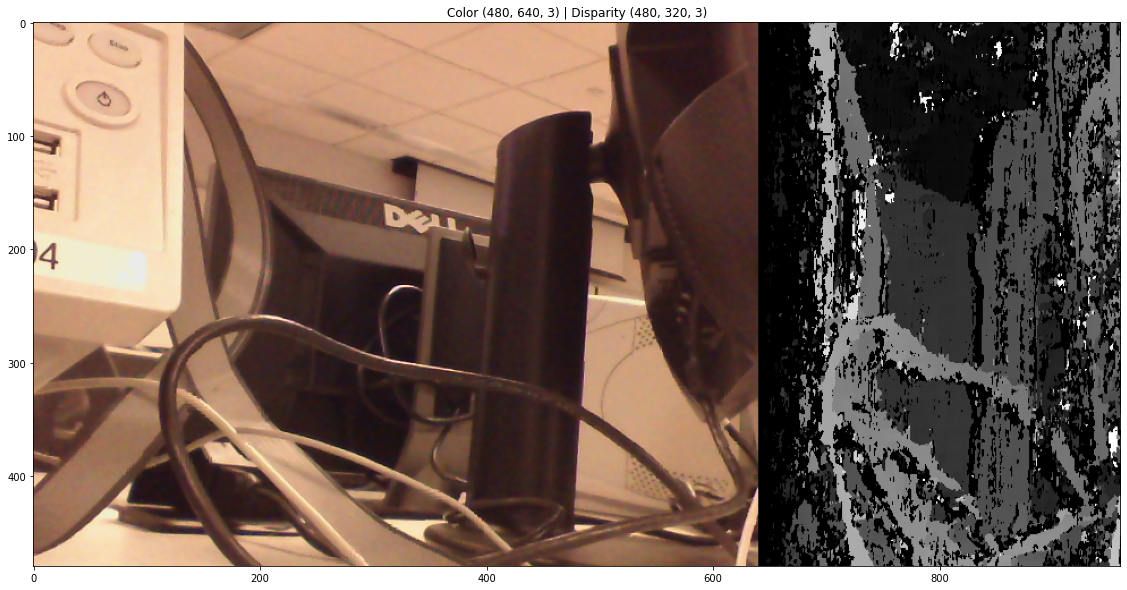

In [6]:
readDepth('table4')